#### 머신러닝 기초학습
---
##### 다음 내용은 '혼자 공부하는 머신러닝'에 대한 내용입니다.
 

##### 설명
- 선형회귀에 대해서 학습합니다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 저번에 사용했던 농어 데이터를 사용해보겠습니다. 주어진 데이터는 농어의 길이와 무게입니다.
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [6]:
# 훈련데이터와 테스트셋을 나눠주고, 2차원 배열로 변환합니다.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length,
                                                                      perch_weight,
                                                                      random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [10]:
# 이전시간에 사용했던 최근접회귀로 훈련시켜볼가요?
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
print('훈련 점수 : {}'.format(knr.score(train_input, train_target)))
print('테스트 점수 : {}'.format(knr.score(test_input, test_target)))

훈련 점수 : 0.9804899950518966
테스트 점수 : 0.9746459963987609


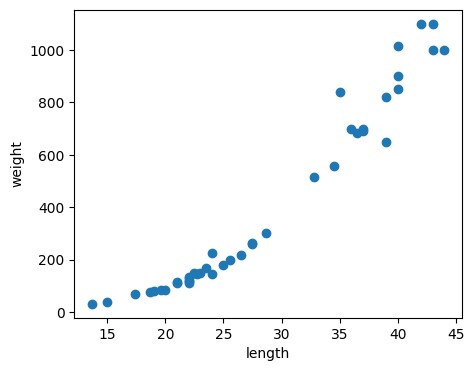

In [12]:
plt.figure(figsize=(5, 4))
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
# 그럼 길이가 50인 생선에 대해서 예측을 해볼까요?
knr.predict([[50]])
# 길이가 50일때, 무게가 1033이라고 예측하는군요!

array([1033.33333333])

In [16]:
# 그럼 길이가 100인 생선에 대해서 또 예측을 해볼까요?
knr.predict([[100]])
# 어? 이번에도 1033이라고 예측을 했군요. 왜 이런 결과가 나오는 걸까요?

array([1033.33333333])

In [17]:
# 먼저 길이가 50인 생선부터 살펴볼까요?
# 길이가 50인 생선 주변의 값들부터 보죠!
distance, index = knr.kneighbors([[50]])

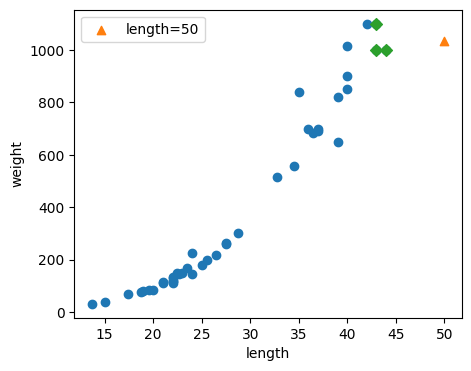

In [21]:
plt.figure(figsize=(5, 4))
plt.scatter(train_input, train_target)
plt.scatter(50, 1033, marker='^', label='length=50')
plt.scatter(train_input[index], train_target[index], marker='D')
plt.legend()
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

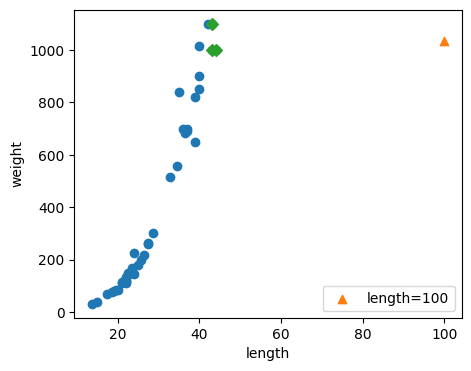

In [22]:
# 이번에는 길이가 100인 생선부터 살펴볼까요?
# 길이가 100인 생선 주변의 값들부터 보죠!
distance, index = knr.kneighbors([[100]])
plt.figure(figsize=(5, 4))
plt.scatter(train_input, train_target)
plt.scatter(100, 1033, marker='^', label='length=100')
plt.scatter(train_input[index], train_target[index], marker='D')
plt.legend()
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [30]:
# 설마 다이아몬드 값들의 평균이 예측값은 아니겠죠?
print(np.sum(train_target[index])/3)
# 아.. 맞네요 ㅠ

1033.3333333333333


In [31]:
# 50과 100의 길이의 공통점을 아시겠나요? 50과 100의 근처의 값이 모두 같다는 겁니다.
# 최근접은 매우 강력한 모델이지만, 값이 분포하지 않는 곳의 값을 예측하기 어렵다는게 단점입니다.
# 제일 끝에 있는 값 이후의 값들을 예측할 수 없으니깐요.
# 이럴때, 사용할 모델은 선형회귀 모델입니다.
# 중학교때 배우는 y = ax+b 그래프를 여기서 사용한다는 이야기입니다.

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print('선형회귀 훈련 점수 : {}'.format(lr.score(train_input, train_target)))
print('선형회귀 테스트 점수 : {}'.format(lr.score(test_input, test_target)))

선형회귀 훈련 점수 : 0.9398463339976041
선형회귀 테스트 점수 : 0.824750312331356


In [35]:
# 그럼 길이가 50인 생선과 100인 생선의 값을 예측해볼까요?
length50 = lr.predict([[50]])
length100 = lr.predict([[100]])
print('길이가 50 : {}'.format(length50))
print('길이가 100 : {}'.format(length100))

길이가 50 : [1241.83860323]
길이가 100 : [3192.69585141]


In [37]:
# 아까 y = ax+b의 그래프에서 a는 기울기, b는 y절편이라고 부르는데 이 값의 데이터는 coef_함수와 intercept_함수에 저장되어있습니다.
print('x의 기울기 : {}'.format(lr.coef_))
print('y절편 : {}'.format(lr.intercept_))

x의 기울기 : [39.01714496]
y절편 : -709.0186449535474


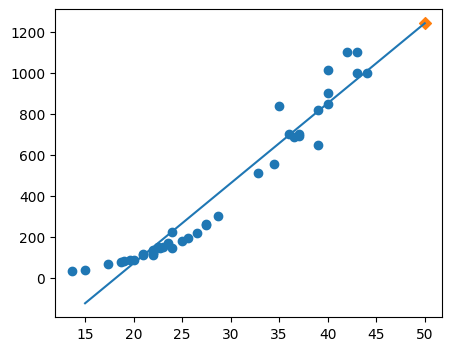

In [47]:
# 그럼 이걸 그래프로 한번 그려볼까요?
plt.figure(figsize=(5, 4))
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(train_input, train_target)
plt.scatter(50, lr.predict([[50]]), marker='D')

In [59]:
# 그래프를 보면 뭔가 이상하죠? 무게가 음수가 나오는 생선은 없으니까요?

In [60]:
# 2차 방정식을 그리려면 제곱한 항이 추가되어야합니다.
# 원래의 데이터에서 제곱한 데이터를 추가해보겠습니다.

In [63]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [65]:
# 해당 데이터를 다시 한번 훈련시켜볼까요?
lr = LinearRegression()
lr.fit(train_poly, train_target)
print('다시 작성한 훈련 데이터 점수 : {}'.format(lr.predict([[50**2, 50]])))
print('다시 작성한 훈련 데이터 점수 : {}'.format(lr.predict([[100**2, 100]])))

다시 작성한 훈련 데이터 점수 : [1573.98423528]
다시 작성한 훈련 데이터 점수 : [8103.57880667]


In [68]:
# 지난번 값보다 더 높은 값을 예측하는군요!
print(lr.coef_, lr.intercept_)
# 다음 그래프는 1.014*x1 -21.557*x2 + 116.050으로 쓸 수 있는거죠!

[  1.01433211 -21.55792498] 116.0502107827827


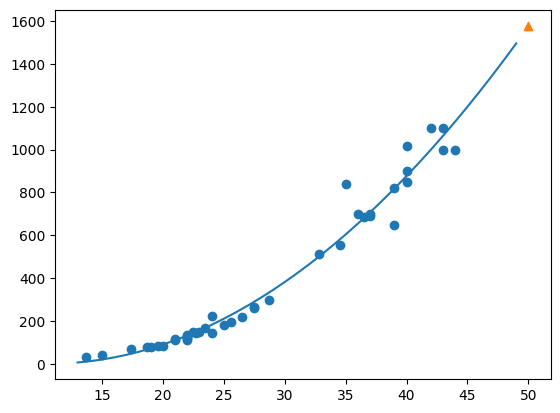

In [75]:
# 해당 그래프를 그리면 이렇게 됩니다. 해당 함수가 곡선형태여서 제곱을 해줬다는 것만 기억하면 됩니다.
x_range = np.arange(13, 50)
plt.scatter(train_input, train_target)
plt.plot(x_range, lr.coef_[0]*x_range**2 + x_range*lr.coef_[1] + lr.intercept_)
plt.scatter(50, lr.predict([[50**2, 50]]), marker='^')

In [79]:
# 아직 부족하긴 하지만 그래도 나쁘지 않은 결과네요!
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
